In [1]:
import numpy as np
import matplotlib.pyplot as plt

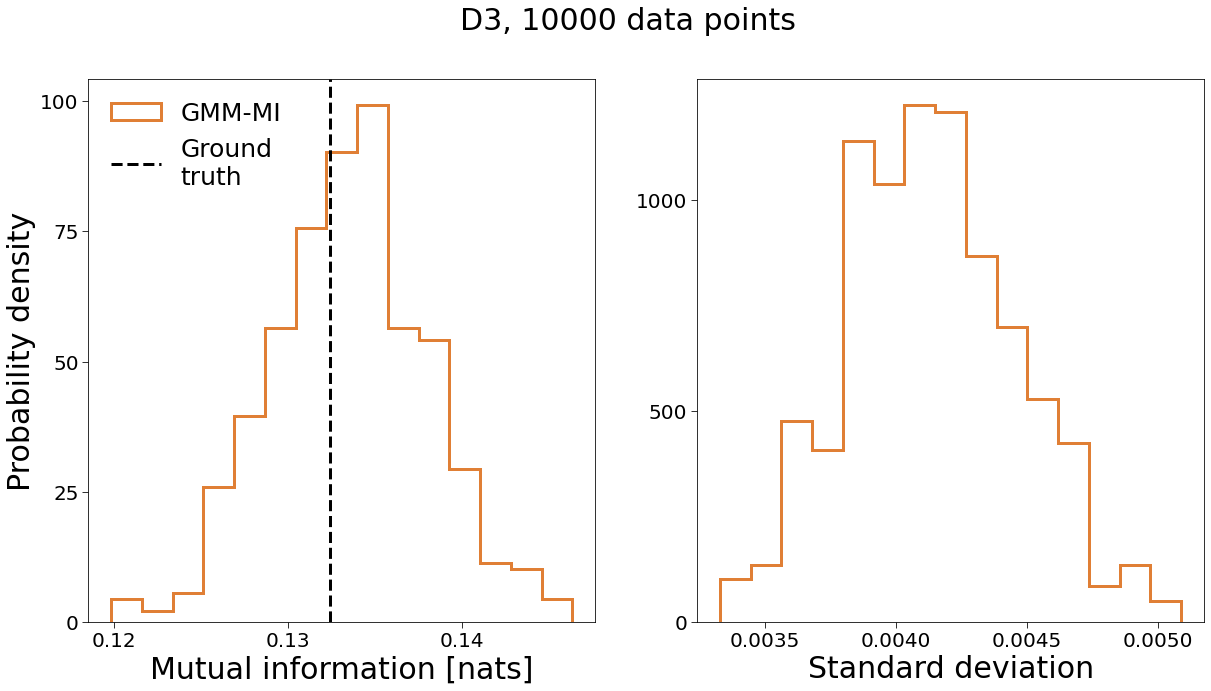

In [2]:
alpha=0.8
bins=15
fontsize=30
N=10000
nbins=5
label = 'D3'
analytic = np.load(f'./MI_synthetic_datasets/MI_{label}.npy')
MI_file = np.load(f'./results/MI_{label}_501_{N}.npy')
color = '#d95f02'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.hist(MI_file[:, 0], alpha=alpha, bins=bins, 
         label='GMM-MI', color=color, density='True', 
         histtype='step', lw=3)
ax1.axvline(analytic, linewidth=3, c='k', linestyle='--', label='Ground\ntruth')
ax1.tick_params(axis='both', which='major', labelsize=20, size=6)
ax1.set_xlabel('Mutual information [nats]', fontsize=fontsize)
ax1.set_ylabel('Probability density', fontsize=fontsize)
ax1.locator_params(nbins=nbins)
ax1.legend(fontsize=25, frameon=False, loc='upper left')

ax2.hist(MI_file[:, 1], alpha=alpha, bins=bins, 
         label='GMM-MI', color=color, density='True',
         histtype='step', lw=3)
ax2.tick_params(axis='both', which='major', labelsize=20, size=6)
ax2.set_xlabel('Standard deviation', fontsize=fontsize)
ax2.locator_params(nbins=nbins)

plt.suptitle(f'{label}, {N} data points', fontsize=fontsize);

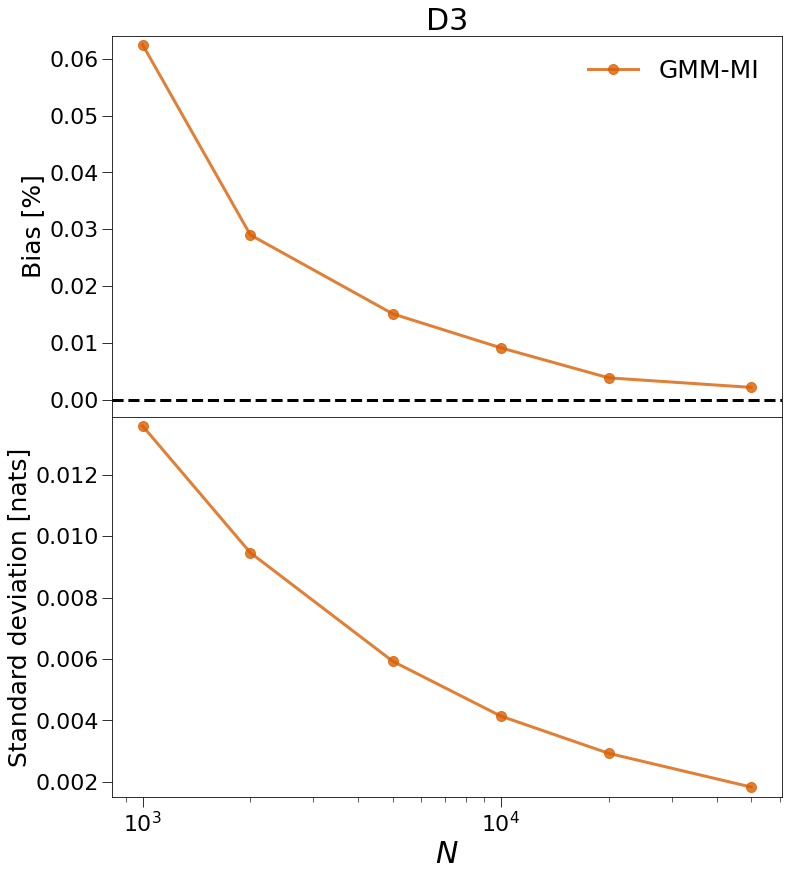

In [3]:
N_values = [1000, 2000, 5000, 10000, 20000, 50000]
MI_values, std_values = [], []

for N in N_values:
    MI_file = np.load(f'./results/MI_{label}_501_{N}.npy')
    MI_values.append((np.mean( (MI_file[:, 0] - analytic) / analytic)))
    std_values.append(np.mean(MI_file[:, 1]))
    
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 14), sharex=True)
lw = 3

ax1.tick_params(axis='both', which='major', labelsize=22, size=10)
ax1.tick_params(axis='both', which='minor', labelsize=22, size=5)
ax1.plot(N_values, MI_values, '-o', markersize=10, color=color, 
         alpha=alpha, lw=lw, label='GMM-MI')
ax1.legend(fontsize=25, frameon=False)        
ax1.set_ylabel('Bias [%]', fontsize=25)
ax1.set_xscale('log')
ax1.set_title(label, fontsize=30)
ax1.axhline(0, linewidth=3, c='k', linestyle='--')
ax1.set_ylim(0-3e-3, 0.064)

ax2.tick_params(axis='both', which='major', labelsize=22, size=10)
ax2.tick_params(axis='both', which='minor', labelsize=22, size=5)
ax2.plot(N_values, std_values, '-o', markersize=10, color=color, 
         alpha=alpha, lw=lw, label='GMM-MI')
ax2.set_ylabel('Standard deviation [nats]', fontsize=25);
ax2.set_xscale('log')
ax2.set_xlabel(r'$N$', fontsize=30)
ax2.set_ylim(0.0015, 0.0139)
fig.subplots_adjust(wspace=0, hspace=0);

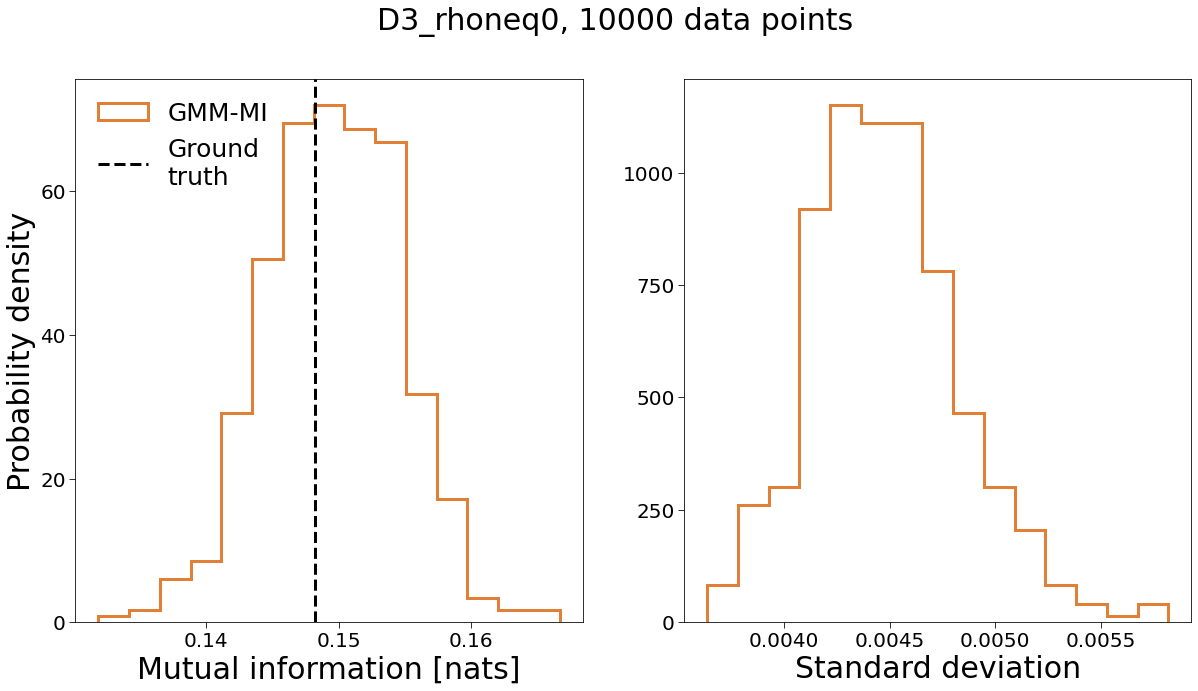

In [4]:
alpha=0.8

bins=15
fontsize=30
N=10000
nbins=5
label = 'D3_rhoneq0'
analytic = np.load(f'./MI_synthetic_datasets/MI_{label}.npy')
MI_file = np.load(f'./results/MI_{label}_501_{N}.npy')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.hist(MI_file[:, 0], alpha=alpha, bins=bins, 
         label='GMM-MI', color=color, density='True', 
         histtype='step', lw=3)
ax1.axvline(analytic, linewidth=3, c='k', linestyle='--', label='Ground\ntruth')
ax1.tick_params(axis='both', which='major', labelsize=20, size=6)
ax1.set_xlabel('Mutual information [nats]', fontsize=fontsize)
ax1.set_ylabel('Probability density', fontsize=fontsize)
ax1.locator_params(nbins=nbins)
ax1.legend(fontsize=25, frameon=False, loc='upper left')

ax2.hist(MI_file[:, 1], alpha=alpha, bins=bins, 
         label='GMM-MI', color=color, density='True',
         histtype='step', lw=3)
ax2.tick_params(axis='both', which='major', labelsize=20, size=6)
ax2.set_xlabel('Standard deviation', fontsize=fontsize)
ax2.locator_params(nbins=nbins)

plt.suptitle(f'{label}, {N} data points', fontsize=fontsize);

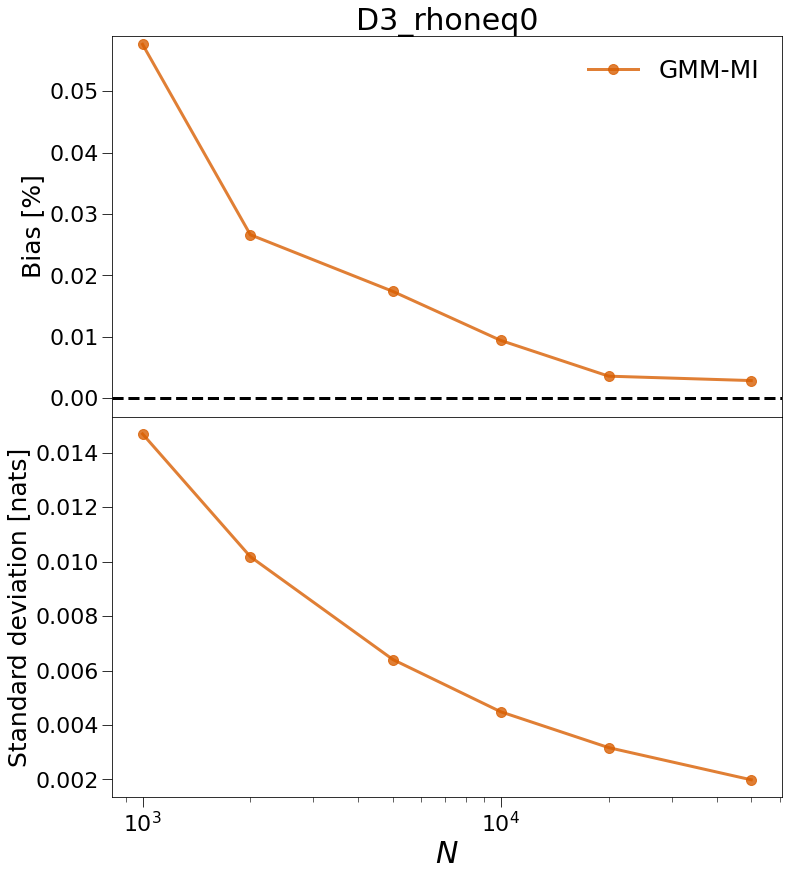

In [5]:
N_values = [1000, 2000, 5000, 10000, 20000, 50000]
MI_values, std_values = [], []
for N in N_values:
    MI_file = np.load(f'./results/MI_{label}_501_{N}.npy')
    MI_values.append((np.mean( (MI_file[:, 0] - analytic) / analytic)))
    std_values.append(np.mean(MI_file[:, 1]))
    
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 14), sharex=True)
lw = 3

ax1.tick_params(axis='both', which='major', labelsize=22, size=10)
ax1.tick_params(axis='both', which='minor', labelsize=22, size=5)
ax1.plot(N_values, MI_values, '-o', markersize=10, color=color, 
         alpha=alpha, lw=lw, label='GMM-MI')
ax1.legend(fontsize=25, frameon=False)        
ax1.set_ylabel('Bias [%]', fontsize=25)
ax1.set_xscale('log')
ax1.set_title(label, fontsize=30)
ax1.set_ylim(0+1e-10, 0.065)
ax1.axhline(0, linewidth=3, c='k', linestyle='--')
ax1.set_ylim(0-3e-3, 0.059)

ax2.tick_params(axis='both', which='major', labelsize=22, size=10)
ax2.tick_params(axis='both', which='minor', labelsize=22, size=5)
ax2.plot(N_values, std_values, '-o', markersize=10, color=color, 
         alpha=alpha, lw=lw, label='GMM-MI')
ax2.set_ylabel('Standard deviation [nats]', fontsize=25);
ax2.set_xscale('log')
ax2.set_xlabel(r'$N$', fontsize=30)
fig.subplots_adjust(wspace=0, hspace=0);

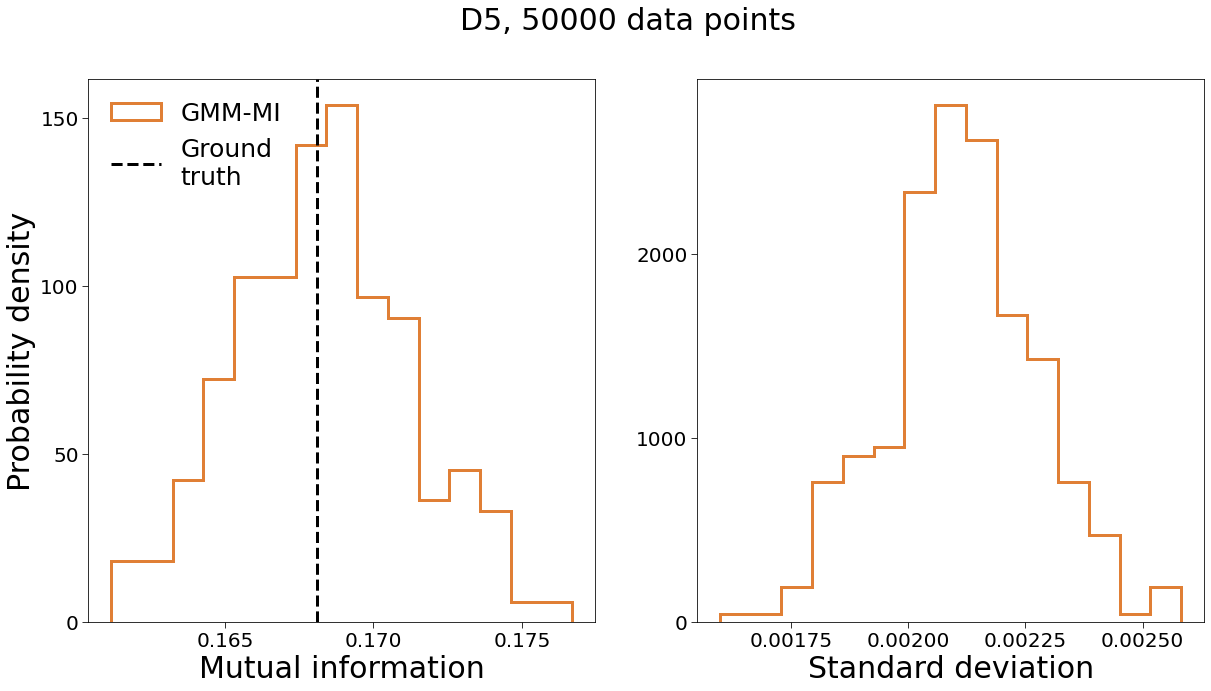

In [15]:
alpha=0.8
bins=15
fontsize=30
N=50000
nbins=5
label = 'D5'
analytic = np.load(f'./MI_synthetic_datasets/MI_{label}.npy')
MI_file = np.load(f'./results/MI_{label}_501_{N}.npy')[:320]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.hist(MI_file[:, 0], alpha=alpha, bins=bins, 
         label='GMM-MI', color=color, density='True', 
         histtype='step', lw=3)
ax1.axvline(analytic, linewidth=3, c='k', linestyle='--', label='Ground\ntruth')
ax1.tick_params(axis='both', which='major', labelsize=20, size=6)
ax1.set_xlabel('Mutual information', fontsize=fontsize)
ax1.set_ylabel('Probability density', fontsize=fontsize)
ax1.locator_params(nbins=nbins)
ax1.legend(fontsize=25, frameon=False, loc='upper left')

ax2.hist(MI_file[:, 1], alpha=alpha, bins=bins, 
         label='GMM-MI', color=color, density='True',
         histtype='step', lw=3)
ax2.tick_params(axis='both', which='major', labelsize=20, size=6)
ax2.set_xlabel('Standard deviation', fontsize=fontsize)
ax2.locator_params(nbins=nbins)

plt.suptitle(f'{label}, {N} data points', fontsize=fontsize);

0
0
0
0
0
0


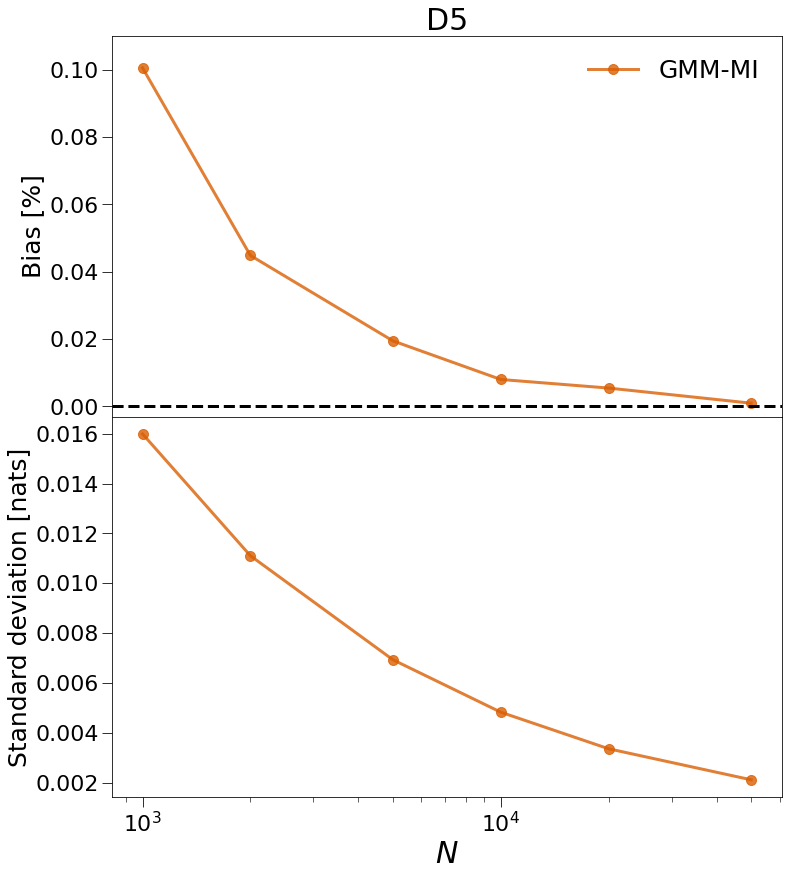

In [16]:
N_values = [1000, 2000, 5000, 10000, 20000, 50000]
MI_values, std_values = [], []
for N in N_values:
    MI_file = np.load(f'./results/MI_{label}_501_{N}.npy')[:320]
    print(len(MI_file[MI_file[:, 0] < 0.13]))
    MI_values.append((np.mean(MI_file[:, 0] - analytic) / analytic))
    std_values.append(np.mean(MI_file[:, 1]))
    
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 14), sharex=True)
lw = 3

ax1.tick_params(axis='both', which='major', labelsize=22, size=10)
ax1.tick_params(axis='both', which='minor', labelsize=22, size=5)
ax1.plot(N_values, MI_values, '-o', markersize=10, color=color, 
         alpha=alpha, lw=lw, label='GMM-MI')
ax1.legend(fontsize=25, frameon=False)        
ax1.set_ylabel('Bias [%]', fontsize=25)
ax1.set_xscale('log')
ax1.set_title(label, fontsize=30)
ax1.axhline(0, linewidth=3, c='k', linestyle='--')
ax1.set_ylim(0-3e-3, 0.11)

ax2.tick_params(axis='both', which='major', labelsize=22, size=10)
ax2.tick_params(axis='both', which='minor', labelsize=22, size=5)
ax2.plot(N_values, std_values, '-o', markersize=10, color=color, 
         alpha=alpha, lw=lw, label='GMM-MI')
ax2.set_ylabel('Standard deviation [nats]', fontsize=25);
ax2.set_xscale('log')
ax2.set_xlabel(r'$N$', fontsize=30)
fig.subplots_adjust(wspace=0, hspace=0);

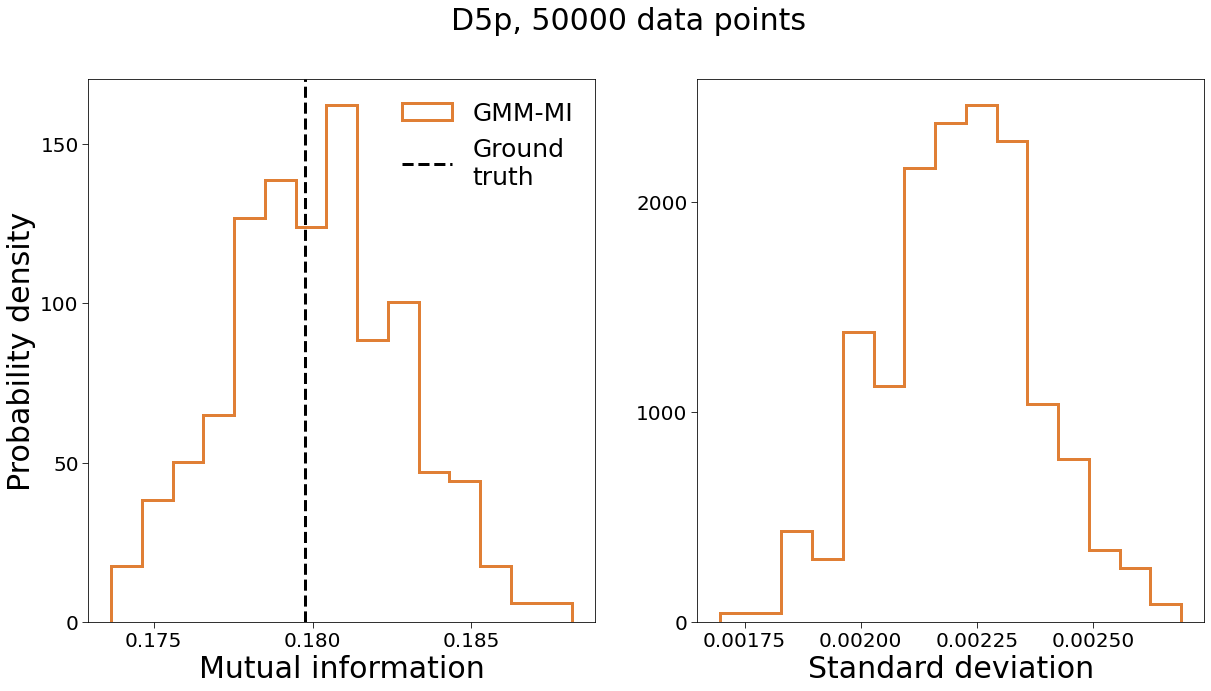

In [21]:
alpha=0.8
bins=15
fontsize=30
N=50000
nbins=5
label = 'D5p'
analytic = np.load(f'./MI_synthetic_datasets/MI_{label}.npy')
MI_file = np.load(f'./results/MI_{label}_501_{N}.npy')[:350]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.hist(MI_file[:, 0], alpha=alpha, bins=bins, 
         label='GMM-MI', color=color, density='True', 
         histtype='step', lw=3)
ax1.axvline(analytic, linewidth=3, c='k', linestyle='--', label='Ground\ntruth')
ax1.tick_params(axis='both', which='major', labelsize=20, size=6)
ax1.set_xlabel('Mutual information', fontsize=fontsize)
ax1.set_ylabel('Probability density', fontsize=fontsize)
ax1.locator_params(nbins=nbins)
ax1.legend(fontsize=25, frameon=False, loc='upper right')

ax2.hist(MI_file[:, 1], alpha=alpha, bins=bins, 
         label='GMM-MI', color=color, density='True',
         histtype='step', lw=3)
ax2.tick_params(axis='both', which='major', labelsize=20, size=6)
ax2.set_xlabel('Standard deviation', fontsize=fontsize)
ax2.locator_params(nbins=nbins)

plt.suptitle(f'{label}, {N} data points', fontsize=fontsize);

0
0
0
0
0
0


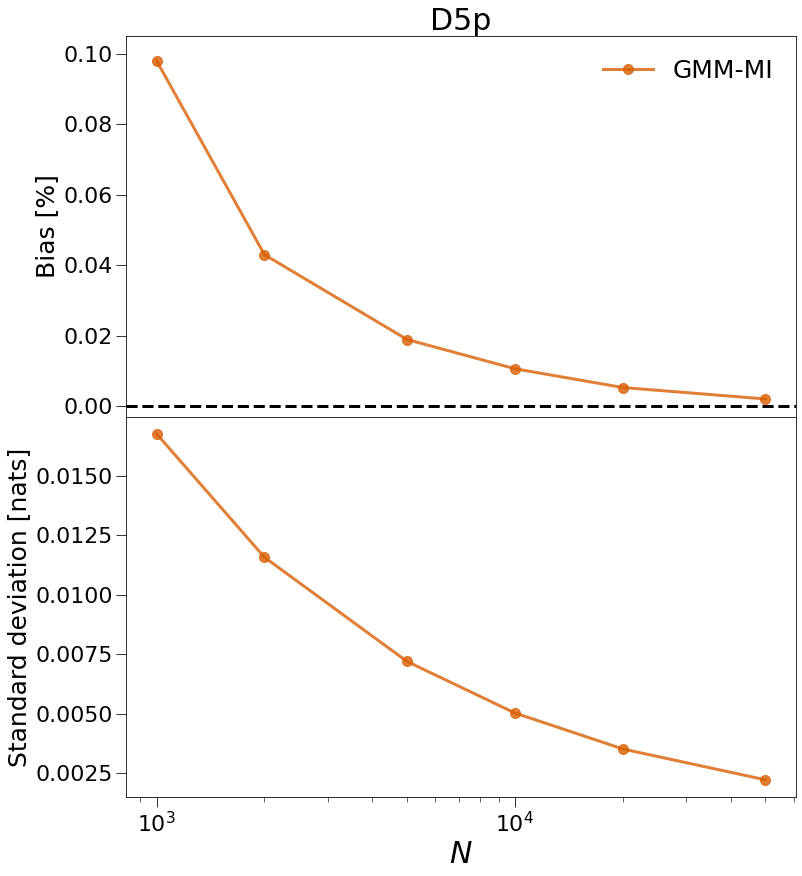

In [24]:
N_values = [1000, 2000, 5000, 10000, 20000, 50000]
MI_values, std_values = [], []
for N in N_values:
    MI_file = np.load(f'./results/MI_{label}_501_{N}.npy')[:350]
    print(len(MI_file[MI_file[:, 0] < 0.14]))
    MI_values.append((np.mean(MI_file[:, 0] - analytic) / analytic))
    std_values.append(np.mean(MI_file[:, 1]))
    
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 14), sharex=True)
lw = 3

ax1.tick_params(axis='both', which='major', labelsize=22, size=10)
ax1.tick_params(axis='both', which='minor', labelsize=22, size=5)
ax1.plot(N_values, MI_values, '-o', markersize=10, color=color, 
         alpha=alpha, lw=lw, label='GMM-MI')
ax1.legend(fontsize=25, frameon=False)        
ax1.set_ylabel('Bias [%]', fontsize=25)
ax1.set_xscale('log')
ax1.set_title(label, fontsize=30)
ax1.axhline(0, linewidth=3, c='k', linestyle='--')
ax1.set_ylim(0-3e-3, 0.105)

ax2.tick_params(axis='both', which='major', labelsize=22, size=10)
ax2.tick_params(axis='both', which='minor', labelsize=22, size=5)
ax2.plot(N_values, std_values, '-o', markersize=10, color=color, 
         alpha=alpha, lw=lw, label='GMM-MI')
ax2.set_ylabel('Standard deviation [nats]', fontsize=25);
ax2.set_xscale('log')
ax2.set_xlabel(r'$N$', fontsize=30)
fig.subplots_adjust(wspace=0, hspace=0);